In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import librosa
import librosa.display

import IPython.display as ipd

import matplotlib.pyplot as plt
# print(os.listdir("../input"))

import torchaudio
import torch.nn as nn
import torch.nn.init as init
import torch
import torch.nn.functional as F
from torch.utils import data
from torchvision import datasets, models, transforms
import torch.optim as optim

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import math, random
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import pandas as pd
import numpy as np
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchaudio import datasets, transforms
from torch.utils.data import Dataset, DataLoader
# from dataloader import SoundDataset
from torch.nn import init
import torchaudio
import pandas as pd
import numpy as np

train_on_gpu=torch.cuda.is_available()

# Any results you write to the current directory are saved as output.

In [ ]:
# import zipfile

# # Will unzip the files so that you can see them..
# with zipfile.ZipFile("../input/"+"train_curated"+".zip","r") as z:
#     z.extractall(".")
    
                    



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Parser

In [ ]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--device', default='0,1', type=str, help='设置使用哪些显卡')
parser.add_argument('--no_cuda', action='store_true', help='不适用GPU进行训练')
parser.add_argument('--filename', default = '/content/drive/MyDrive/Colab_Notebooks/music-regression/audios/clips')

# parser.add_argument('--filename', default='.',type = str,help = 'enter your filepath') 
args = parser.parse_args(args=['--device', '1',  '--no_cuda','--filename','/content/drive/MyDrive/Colab_Notebooks/music-regression/audios/clips'])
print(args)

# Mount on drive to read file 

In [3]:

Labels = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/music-regression/train.csv")
Labels.head()
WavPath = '/content/drive/MyDrive/Colab_Notebooks/music-regression/audios/clips/'
Fils = os.listdir(WavPath)
sound, sample_rate = torchaudio.load(WavPath+Fils[2])
ipd.Audio(data=sound[0,:],rate=sample_rate) # load a local WAV file


# Test for Librosa function (but failed)


In [4]:
Labels = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/music-regression/train.csv")
Labels.head()
# Labels['country']

,track,views,country,score
0,normalize_5s_intro_thc1MtNagC8.wav,38319601,NaN,0.676471
1,normalize_5s_intro_Wo2qUD1g7xM.wav,71940972,VN,0.666667
2,normalize_5s_intro_3ObVN3QQiZ8.wav,28548855,FR,0.447368
3,normalize_5s_intro_S-zQJFRX5Fg.wav,310197,NaN,0.876712
4,normalize_5s_intro_SyZOAgXiPMw.wav,1283578,NaN,0.325000


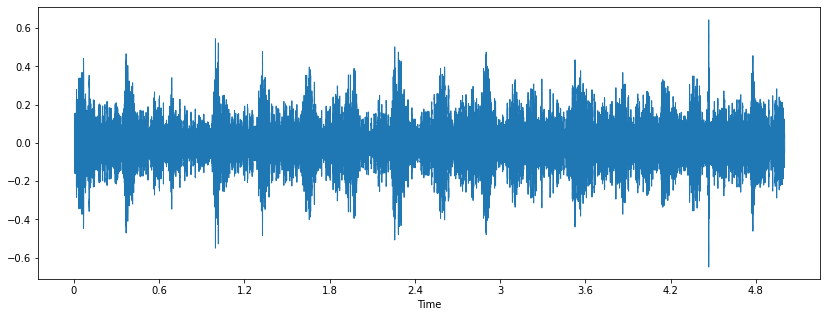

<Figure size 1008x360 with 0 Axes>

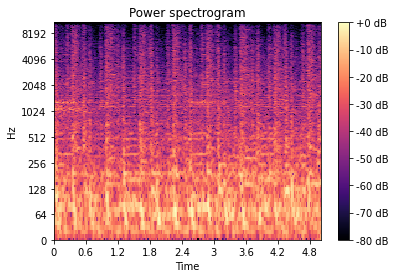

In [5]:
x, sr = librosa.load(WavPath+Fils[2])

plt.figure(figsize=(14, 5))



librosa.display.waveshow(x, sr=sr)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
Xdb.shape

# S = librosa.feature.melspectrogram(x, sr=sample_rate, n_mels=128)



# 計算短時距傅立葉變換
S = np.abs(librosa.stft(x))

# 繪製短時距傅立葉變換圖
fig, ax = plt.subplots()
img = librosa.display.specshow(
    librosa.amplitude_to_db(S, ref=np.max),
    y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
log_S = librosa.power_to_db(S, ref=np.max)

fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

#MFCC = librosa.feature.mfcc(y=x, sr=sample_rate,n_mfcc=23,dct_type=2)
#print(np.max(MFCC),np.min(MFCC))
#MFCC = (MFCC+200)/500
#print(np.max(MFCC),np.min(MFCC))


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 235.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([480043.5 , 480043.52, 480043.54, 480043.56, 480043.58, 480043.6 ,
        480043.62, 480043.64, 480043.66, 480043.68, 480043.7 , 480043.72,
        480043.74, 480043.76, 480043.78, 480043.8 , 480043.82, 480043.84,
        480043.86, 480043.88, 480043.9 , 480043.92, 480043.94, 480043.96,
        480043.98, 480044.  , 480044.02, 480044.04, 480044.06, 480044.08,
        480044.1 , 480044.12, 480044.14, 480044.16, 480044.18, 480044.2 ,
        480044.22, 480044.24, 480044.26, 480044.28, 480044.3 , 480044.32,
        480044.34, 480044.36, 480044.38, 480044.4 , 480044.42, 480044.44,
        480044.46, 480044.48, 480044.5 ]),
 <a list of 50 Patch ob

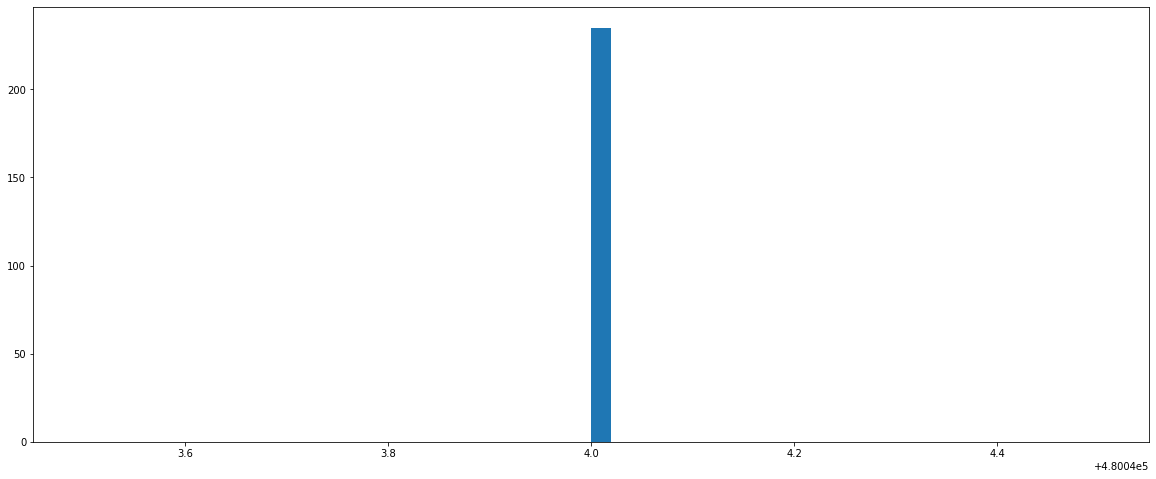

In [6]:
FilesS = np.zeros(len(Fils))
for i,File in enumerate(Fils):
    FilesS[i] = os.path.getsize(WavPath+File)

plt.figure(figsize=(20,8))
plt.hist(FilesS,bins=50)

# Dataloader for audio


In [9]:
def getData(mode):
    if mode == 'train':
        data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/music-regression/train.csv")
        audio_name = data.track
        score = data.score
        return np.squeeze(audio_name.values), np.squeeze(score.values)
    else:
        data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/music-regression/test.csv")
        audio_name = data.track
        return np.squeeze(audio_name.values)

class AudioUtil():
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)

  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      
    return (sig, sr)

  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

  def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

  def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)

    return aug_spec

class SoundDataset(Dataset):
    def __init__(self, audio_path, mode):
        self.audio_path = audio_path
        self.mode = mode
        if self.mode == "train":
            self.audio_name, self.score = getData(mode)
        else:
            self.audio_name = getData(mode)

        self.duration = 1000
        self.sr = 44100
        self.channel = 2
        self.shift_pct = 0.2
        
    def __getitem__(self, index):
        if self.mode == "train":
            single_audio_name = os.path.join(self.audio_path, self.audio_name[index])
            aud = AudioUtil.open(single_audio_name)
            reaud = AudioUtil.resample(aud, self.sr)
            rechan = AudioUtil.rechannel(reaud, self.channel)

            # dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
            # shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
            sgram = AudioUtil.spectro_gram(rechan, n_mels=64, n_fft=1024, hop_len=None)
            aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

            score = self.score[index]
            return aug_sgram, score
        else: 
            single_audio_name = os.path.join(self.audio_path, self.audio_name[index])
            aud = AudioUtil.open(single_audio_name)
            reaud = AudioUtil.resample(aud, self.sr)
            rechan = AudioUtil.rechannel(reaud, self.channel)

            # dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
            # shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
            sgram = AudioUtil.spectro_gram(rechan, n_mels=64, n_fft=1024, hop_len=None)
            aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
            return aug_sgram, single_audio_name[32:]

    def __len__(self):
        return len(self.audio_name)


In [10]:
# class CnnAudioNet(nn.Module):
#     def __init__(self,_):
#         super(CnnAudioNet,self).__init__()
# #         self.NumClasses = NumClasses
#         self.Fc_features = 128
#         self.C1 = nn.Conv2d(32,32,5,padding=1)
#         self.C2 = nn.Conv2d(32,32,5,padding=1)
#         self.C3 = nn.Conv2d(32,64,5,padding=1)
#         self.C4 = nn.Conv2d(64,64,5,padding=1)

#         self.BN1 = nn.BatchNorm2d(32)
#         self.BN2 = nn.BatchNorm2d(32)
#         self.BN3 = nn.BatchNorm2d(64)
#         self.BN4 = nn.BatchNorm2d(64)
#         self.BN5 = nn.BatchNorm2d(64)

#         self.maxpool1 = nn.MaxPool2d(2,2)
#         self.maxpool2 = nn.MaxPool2d((1,2),(1,2))


#         self.fc1 = nn.Linear(64*8*8,128)
#         self.fc2 = nn.Linear(128,1 )   

#         self.dropout = nn.Dropout(0.25)
#         self.Bat1 = nn.BatchNorm1d(128)

        
        
#     def forward(self,x):
#         # add sequence of convolutional and max pooling layers
#         x = F.relu(self.BN1(self.C1(x)))
#         x = self.maxpool1(F.relu(self.BN2(self.C2(x))))
#         x = F.relu(self.BN3(self.C3(x)))
#         x = self.maxpool1(F.relu(self.BN4(self.C4(x))))
#         x = F.relu(self.BN5(self.C4(x)))
#         # flatten image input
#         # x = self.dropout(x.view(-1,1))
#         # add dropout layer
#         # x =  self.dropout(self.fc1(x))
#         # add 1st hidden layer, with relu activation function
#         # add dropout layer
#         # add 2nd hidden layer, with relu activation function
#         #x = torch.sigmoid(self.fc2(x))
#         x = self.fc2(x)
#         # x = self.fc2(x)
#         # x = self.fc3(x)
#         return x
        

# network structure


In [68]:
class Net(nn.Module):

    def __init__(self):
      
        super(Net, self).__init__()
        conv_layers = []

        self.conv1 = nn.Conv2d(2,8,5,padding=2)
        self.conv2 = nn.Conv2d(8,16,3,padding=1)       
        self.conv3 = nn.Conv2d(16,32,3,padding=1)
        self.conv4 = nn.Conv2d(32,64,3,padding=1)

        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu3 = nn.ReLU()
        self.relu4 = nn.ReLU()

        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.bn3 = nn.BatchNorm2d(32)
        self.bn4 = nn.BatchNorm2d(64)

        self.conv1.bias.data.zero_()
        self.conv2.bias.data.zero_()
        self.conv3.bias.data.zero_()
        self.conv4.bias.data.zero_()

        conv_layers += [self.conv1, self.relu1, self.bn1]
        conv_layers += [self.conv2, self.relu2, self.bn2]
        conv_layers += [self.conv3, self.relu3, self.bn3]
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=1)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)

    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x


def train(model, train_loader, device):

    epochs = 200

    optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_loader)),
                                                epochs=epochs,
                                                anneal_strategy='linear')
    criterion = nn.MSELoss()
    for epoch in range(1, epochs+1):
        model.train()
        total_loss = 0
        for i, (audio, score) in enumerate(train_loader):
            audio = audio.to(device,dtype = torch.float32)
            score = score.to(device, dtype = torch.float32)
        # audio = audio.unsqueeze(0)
            output = model(audio)
            score = score.view(-1,1)
            loss = criterion(output, score)
            total_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()

        total_loss = total_loss / len(train_loader)
        print(f'the epoch is : {epoch:>5d}  MSEloss : {total_loss:.6f}')


if __name__== "__main__":

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)
    model = Net()
    model = model.to(device)

    train_dataset = SoundDataset("/content/drive/MyDrive/Colab_Notebooks/music-regression/audios/clips", mode="train")
    train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
    train(model=model, train_loader=train_loader, device=device)
    torch.save(model.state_dict(),"./audio2.pth")

cuda
the epoch is :     1  MSEloss:0.333113
the epoch is :     2  MSEloss:0.327432
the epoch is :     3  MSEloss:0.320519


KeyboardInterrupt: ignored

# testing

In [43]:


sub = {"track": [],
        "score": []}
df = pd.DataFrame(sub)



def evaluate(model, test_loader, device):
    count = 0
    with torch.set_grad_enabled(False):
        for batch_index, (audio, name) in enumerate(test_loader):
            audio = audio.to(device)
            predict = model(audio)
            for i in range(len(predict)):
                df.at[count, 'track'] = name[i]
                df.at[count, 'score'] = predict[i]
                count = count+1
            
                
            


# parser = argparse.ArgumentParser(description=__doc__)
# parser.add_argument('--filename', default="/content/drive/MyDrive/Colab_Notebooks/music-regression/audios/clips")
# args = parser.parse_args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_dataset = SoundDataset("/content/drive/MyDrive/Colab_Notebooks/music-regression/audios/clips", mode="test")
   
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=True)
model = Net()
model.load_state_dict(torch.load("./audio2.pth"))
model=model.to(device)
evaluate(model, test_loader, device)
    # print(df)
df.to_csv("submission.csv", index=False)

# save it to drive


In [18]:
!cp audio2.pth /content/drive/MyDrive/Colab_Notebooks/music-regression/

In [44]:
!cp submission.csv /content/drive/MyDrive/Colab_Notebooks/music-regression/